In [13]:
from sklearn.svm import LinearSVC
from sklearn.learning_curve import learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def plot_learning_curve(estimator,title, X, y ,ylim=None,cv=None,train_sizes=np.linspace(.1,1.0,5)):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    """
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)
    plt.show()


In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=20, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)
#生成随机数据集

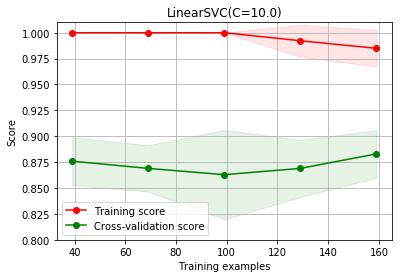

In [16]:
#Training score 在cross validation线之上表明过拟合，不然欠拟合
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.01),
                    train_sizes=np.linspace(.05, 0.2, 5))

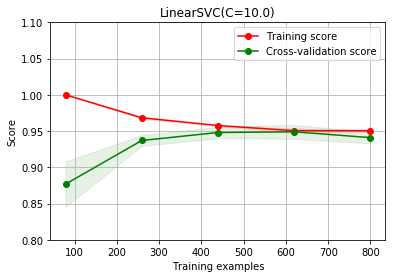

In [19]:
#增大一些样本量
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.1),
                    train_sizes=np.linspace(.1, 1.0, 5))

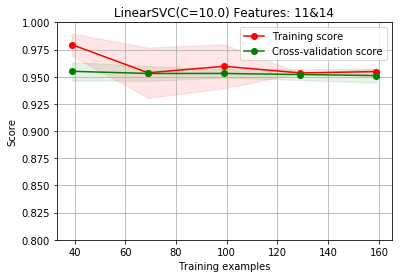

In [17]:
#减少特征的量
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0) Features: 11&14", 
                    X[:, [11, 14]], y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))
#过拟合问题也得到一定程度的缓解。不过我们这是自己观察后，手动选出11和14维特征。
#那能不能自动进行特征组合和选择呢，其实我们当然可以遍历特征的组合样式，
#然后再进行特征选择(前提依旧是这里特征的维度不高，如果高的话，遍历所有的组合是一个非常非常非常耗时的过程！！)：

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

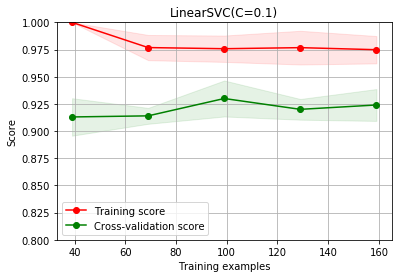

In [22]:
# SelectKBest(f_classif, k=2) 会根据Anova F-value选出 最好的k=2个特征
#之所以做特征选择，是想降低模型的复杂度，而更不容易刻画到噪声数据的分布。从这个角度出发，我们还可以有(1)多项式你和模型中降低多项式次数 
#(2)神经网络中减少神经网络的层数和每层的结点数 (3)SVM中增加RBF-kernel的bandwidth等方式来降低模型的复杂度。
#增强正则化作用(比如说这里是减小LinearSVC中的C参数),正则化在信息不损失的情况下，最有效缓解过拟合的方法
plot_learning_curve(LinearSVC(C=0.1), "LinearSVC(C=0.1)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

c:\python27\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


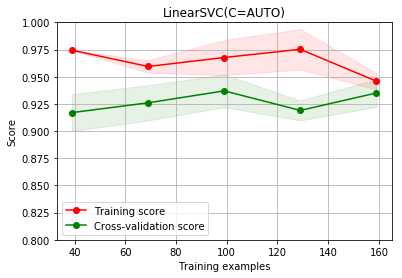

Chosen parameter on 100 datapoints: {'C': 0.001}


In [23]:
from sklearn.grid_search import GridSearchCV
estm = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(estm, "LinearSVC(C=AUTO)", 
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))
print "Chosen parameter on 100 datapoints: %s" % estm.fit(X[:500], y[:500]).best_params_

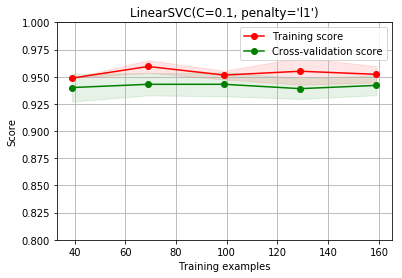

In [24]:
#l2正则化，它对于最后的特征权重的影响是，尽量打散权重到每个特征维度上，不让权重集中在某些维度上，出现权重特别高的特征。
#•而l1正则化，它对于最后的特征权重的影响是，让特征获得的权重稀疏化，也就是对结果影响不那么大的特征，干脆就拿不着权重。
plot_learning_curve(LinearSVC(C=0.1, penalty='l1', dual=False), "LinearSVC(C=0.1, penalty='l1')", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))


In [26]:
estm = LinearSVC(C=0.1, penalty='l1', dual=False)
estm.fit(X[:450], y[:450])  # 用450个点来训练
print "Coefficients learned: %s" % estm.coef_
print "Non-zero coefficients: %s" % np.nonzero(estm.coef_)[1]

Coefficients learned: [[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -3.22364842e-02
   -1.66075216e-02   4.41180663e-03  -4.32416282e-02   3.85081419e-02
    0.00000000e+00   0.00000000e+00   6.27275024e-02   1.22236913e+00
    1.18921814e-01  -9.41719864e-04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   9.27594479e-02   0.00000000e+00]]
Non-zero coefficients: [ 3  4  5  6  7 10 11 12 13 18]
